In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVC
from sklearn.utils import resample
from sklearn.feature_selection import SelectKBest, f_classif
%matplotlib inline
import statsmodels.api as sm

In [2]:
df = pd.read_csv('C:\\Users\\Square Bear\\Documents\\Thinkful\\Datasets\\creditcard.csv')
pd.options.display.max_columns = None
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:

df.Class.value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [4]:
fraudulent = df[df.Class == 1]
real_indices = df[df.Class == 0].index
real_downsample = np.random.choice(real_indices, 492, replace = False)
real = df.loc[real_downsample]
sample = pd.concat([fraudulent, real])

In [5]:
sample.Class.value_counts()


1    492
0    492
Name: Class, dtype: int64

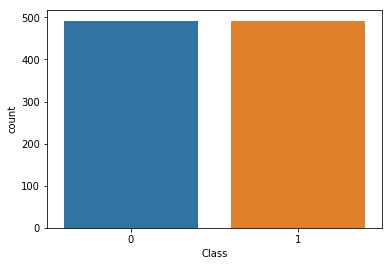

In [6]:
class_undersample = sns.countplot(x='Class', data=sample)


In [7]:
clf = SVC(class_weight='balanced', probability=True)


In [8]:

X_train = sample.drop(['Class'], 1)
Y_train = sample.Class

In [9]:
clf.fit(X_train,Y_train)
X_test = df.drop(['Class'], 1).sample(n=5000, replace=False)
Y_test = df.Class.sample(n=5000, replace=False)
scores = cross_val_score(clf, X_test, Y_test, cv=5)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarni

In [10]:
print('Cross-Validation Scores: {}'.format(scores))
print('Averaged Cross-Validation Scores: {:.2%}.'.format(scores.mean()))

Cross-Validation Scores: [0.997003 0.998    0.998    0.998    0.997998]
Averaged Cross-Validation Scores: 99.78%.


In [11]:
Y_pred = clf.predict(X_test)


In [12]:
confusion_matrix = pd.crosstab(Y_test, Y_pred, margins = True)
tI_errors = confusion_matrix.loc[0.0, 1.0] / confusion_matrix.loc['All', 'All']
tII_errors = confusion_matrix.loc[1.0, 0.0] / confusion_matrix.loc['All', 'All']

In [13]:
confusion_matrix.head()

col_0,0,1,All
Class,,,
0,4978,11,4989
1,11,0,11
All,4989,11,5000


In [14]:
print(('Type I Error Rate: {:.2%}.\n''Type II Error Rate: {:.2%}.\n').format(tI_errors, tII_errors))

Type I Error Rate: 0.22%.
Type II Error Rate: 0.22%.



In [15]:

prob_Y = clf.predict_proba(X_test)
prob_Y = [p[1] for p in prob_Y]
print('AUROC Score: {:.2%}.'.format(roc_auc_score(Y_test, prob_Y)))

AUROC Score: 59.70%.


In [16]:
#Pipeline Construction.
anova = SelectKBest(f_classif, k=10)
svm = SVC(kernel='rbf')
anova_svm = make_pipeline(anova, svm)

#Fitting & Cross-Validation.
anova_svm.fit(X_train,Y_train)
scores = cross_val_score(anova_svm, X_test, Y_test, cv=5)

#De-Masking Selected Features.
features = anova.get_support(indices=True)
feature_names = list(X_test.columns)
selected_features = []
for feature in features:
    selected_features.append(feature_names[feature])

#Printing Outcomes.
print('Cross-Validation Scores: {}\n'.format(scores))
print('Cross-Validation Score Averaged Across Folds: {:.2%}.\n'.format(scores.mean()))
print('Selected Features: {}\n'.format(selected_features))

prob_Y = clf.predict_proba(X_test)
prob_Y = [p[1] for p in prob_Y]
print('AUROC Score: {:.2%}.'.format(roc_auc_score(Y_test, prob_Y)))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarni

Cross-Validation Scores: [0.997003 0.998    0.998    0.998    0.997998]

Cross-Validation Score Averaged Across Folds: 99.78%.

Selected Features: ['V2', 'V3', 'V4', 'V9', 'V10', 'V11', 'V12', 'V14', 'V16', 'V17']

AUROC Score: 59.70%.


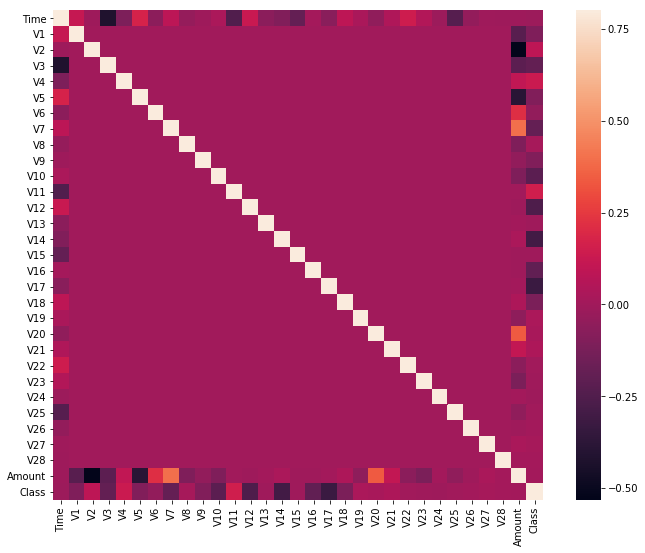

In [17]:
# Make the correlation matrix.
cor = df.corr()

# Set up the matplotlib figure.
f, ax = plt.subplots(figsize=(12, 9))

# Draw the heatmap using seaborn.
sns.heatmap(cor, vmax=.8, square=True)
plt.show()


In [18]:
# Statsmodel logistic regression

# Declare predictors.
y_statsmod = df['Class']
x_statsmod = df.iloc[:,:-1]

# The Statsmodels formulation requires a column with constant value 1 that
# will act as the intercept.
x_statsmod['intercept'] = 1 

# Declare and fit the model.
logit = sm.Logit(y_statsmod, x_statsmod)
result = logit.fit()

# Lots of information about the model and its coefficients, but the
# accuracy rate for predictions is missing.
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.003914
         Iterations 13
                           Logit Regression Results                           
Dep. Variable:                  Class   No. Observations:               284807
Model:                          Logit   Df Residuals:                   284776
Method:                           MLE   Df Model:                           30
Date:                Sun, 04 Aug 2019   Pseudo R-squ.:                  0.6922
Time:                        23:50:51   Log-Likelihood:                -1114.8
converged:                       True   LL-Null:                       -3621.2
                                        LLR p-value:                     0.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Time       -3.742e-06   2.26e-06     -1.659      0.097   -8.16e-06    6.79e-07
V1             0.0960      0